## Time Series Problems using LSTMs - Prac 2

### Practical Introduction to Deep Learning - AIMS 2019

***Dr. Emmanuel Dufourq*** www.emmanueldufourq.com

***African Institute for Mathematical Sciences***

***Stellenbosch University***

***2019***




## Imports

In [ ]:
import numpy as np
import tensorflow as tf
import pandas
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import math

# Keras imports
from keras.models import Sequential
from keras.layers import Dense

# Here we import the LSTM cell which allows us to make LSTM cells
# Here is the documentation for the LSTM cell in Keras https://keras.io/layers/recurrent/#lstm
from keras.layers import LSTM

%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

1.15.0


Using TensorFlow backend.


## Read dataset

In [ ]:
# Read in the data using Pandas
dataframe = pandas.read_csv('https://drive.google.com/uc?export=download&id=1XOpHe_0_TGhZc8_V3zjqDEj8BOl5jucF')

In [ ]:
dataframe

Month  #Passengers
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
..       ...          ...
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

[144 rows x 2 columns]

In [ ]:
# Store the dataset into a numpy array
dataset = dataframe['#Passengers'].values

### Print the shape of the dataset

In [ ]:
dataset.shape

(144,)

## Reshape the data into a long vector

In [ ]:
dataset_vector = dataset.reshape(-1,1)

In [ ]:
dataset_vector.shape

(144, 1)

## Plot all the data

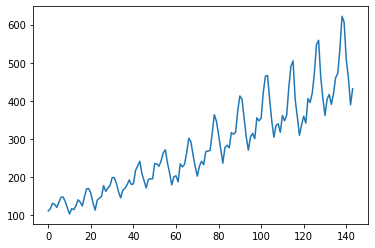

In [ ]:
plt.plot(dataset_vector[0:])
plt.show()

## Normalise

Normalise the data so that all the values are between 0 and 1. Here we make use of ScikitLearn's MinMaxScaler() function. There are alternatives. Here is a link to various pre-processing steps that you can use: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

In [ ]:
# Take a look at the values before applying the normalisation
dataset_vector[0:5]

array([[112],
       [118],
       [132],
       [129],
       [121]])

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset_vector = scaler.fit_transform(dataset_vector)

In [ ]:
# Now look at the values after applying the normalisation (Note: it's always a good idea to print 
# your data often to the screen so you can check what's going on. This way you can easily catch mistakes
# at an early stage).
dataset_vector[0:5]

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853]])

## Train/test split

In [ ]:
# Define the amount of data that will be used for training. This is a slightly different approach to using Scikit
# learn's built in function train_test_split. Here we are the splitting manually. It might be a good idea to try re
# write this code to use scikit learn's function.
train_size = int(len(dataset_vector) * 0.67)

# Define the amount of data that will be used for testing (total length minus the amount of training data).
test_size = len(dataset_vector) - train_size

# Split the data manually (note that here we are not shuffling the data)
train, test = dataset_vector[0:train_size,:], dataset_vector[train_size:len(dataset_vector),:]

### Create the labels for the dataset

As it stands, the dataset does not have labels (targets) - i.e. the things you want to predict. The dataset just has values of the carbon emission for each month across multiple years. We need to create our predictions manually by shifting the data. 

<b> Note: </b>

The function <i>create_dataset</i> shifts the data in such a way that we can create features and targets. This will make sense in the figures below.

In [ ]:
def create_dataset(dataset, window_size = 1):
    data_X, data_Y = [], []
    for i in range(len(dataset) - window_size - 1):
        a = dataset[i:(i + window_size), 0]
        data_X.append(a)
        data_Y.append(dataset[i + window_size, 0])
    return(np.array(data_X), np.array(data_Y))

In [ ]:
look_back = 1

# Split the data into training features and training targets
X_train, Y_train = create_dataset(train, look_back)

# Split the data into testing features and testing targets
X_test, Y_test = create_dataset(test, look_back)

### Print out the shape of the data

Always a good idea to print the shapes to make sure that everything worked well.

In [ ]:
print('Train X shape ',X_train.shape)
print('Train Y shape',Y_train.shape)
print('Test X shape ',X_test.shape)
print('Test Y shape ',Y_test.shape)

Train X shape  (94, 1)
Train Y shape (94,)
Test X shape  (46, 1)
Test Y shape  (46,)


## Reshape to [samples, timesteps, features]

We need to reshape the data into [samples, timesteps, features] as this is what Keras expects.

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

### Check that the numpy reshape function actually did what we wanted.

Here we want [samples, timesteps, features]. 

In [ ]:
print('Train X shape ',X_train.shape)
print('Train Y shape',Y_train.shape)
print('Test X shape ',X_test.shape)
print('Test Y shape ',Y_test.shape)

Train X shape  (94, 1, 1)
Train Y shape (94,)
Test X shape  (46, 1, 1)
Test Y shape  (46,)


## Look at the data and notice the pattern

In [ ]:
X_train[0]

array([[0.01544402]])

In [ ]:
Y_train[0]

0.02702702702702703

In [ ]:
X_train[1]

array([[0.02702703]])

In [ ]:
Y_train[1]

0.05405405405405403

## Task: Create a LSTM model

* Create the model
* Add an LSTM layer
* Compile the model



In [ ]:
## YOUR CODE HERE

In [ ]:
# Check the number of parameters. Always a good idea to take a look at the model from Keras' point of view
model.summary()

NameError: ignored

## Task use an appropriate number of epochs

In [ ]:
model.fit(X_train, Y_train, epochs=XX, batch_size=1, verbose=2, validation_split=0.2)

## Predict on the test data and prepare the data for plotting

In [ ]:
# generate predictions for training
trainPredict = model.predict(X_train, batch_size=1)
testPredict = model.predict(X_test, batch_size=1)
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset_vector)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset_vector)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset_vector)-1, :] = testPredict

## Plot the predictions and the correct targets

In [ ]:
plt.figure(figsize=(10, 10))
plt.plot(dataset_vector)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

<hr>